In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from datetime import datetime

In [2]:
#importing the os module
import os

#to get the current working directory
directory = os.getcwd()

print(directory)

#os.chdir("D:\DATA\Personal\Data-Analytics\GL\")


D:\DATA\Personal\Data-Analytics\Python\Code\GL-Case-Study1


In [13]:
# Load dataset

df = pd.read_excel (r'D:\DATA\Personal\Data-Analytics\Python\Code\GL-Case-Study1\OnlineRetail.xlsx', sheet_name='Online Retail')


In [14]:
df1 = df

In [12]:
df1.head()
print(df1.head())
df1.info()

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  
0 2010-12-01 08:26:00       2.55      17850  United Kingdom  
1 2010-12-01 08:26:00       3.39      17850  United Kingdom  
2 2010-12-01 08:26:00       2.75      17850  United Kingdom  
3 2010-12-01 08:26:00       3.39      17850  United Kingdom  
4 2010-12-01 08:26:00       3.39      17850  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   

In [7]:
# Truncating the decimal in Customer ID
df1['CustomerID'] = df['CustomerID'].fillna(0).astype('int64')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [8]:
# Convert relevant columns to type category for your label encoding

df1["CustomerID"] = df1["CustomerID"].astype('category')
df1["StockCode"] = df1["StockCode"].astype('category')
df1["InvoiceNo"] = df1["InvoiceNo"].astype('category')
df1["Country"] = df1["Country"].astype('category')
df1["Description"] = df1["Description"].astype('category')

# convert the 'Date' column to datetime format
df1['InvoiceDate']= pd.to_datetime(df1['InvoiceDate'],infer_datetime_format=True)
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  category      
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  category      
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  category      
 7   Country      541909 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 18.7 MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [9]:
# Start and end dates:
print('Start date: {}'.format(df1['InvoiceDate'].min()))
print('End date: {}'.format(df1['InvoiceDate'].max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [10]:
print('Duplicate entries: {}'.format(df1.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df1.duplicated().sum()/df1.shape[0])*100),2))
df1.drop_duplicates(inplace = True)

Duplicate entries: 5268
1% rows are duplicate.


In [20]:
# count the number of missing values for each column
print(df1.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [18]:
# removes missing data and index
df1 = df1[df1['Description'].notna()]
df1.reset_index(drop=True,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.0+ MB


In [19]:
# removes missing data and index
df1 = df1[df1['CustomerID'].notna()]
df1.reset_index(drop=True,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [ ]:
# count for negative values in quantity 
df1.loc[df1['Quantity'] < 0,:]

In [23]:
# Negative values in quantity indicates cancelled orders
df1['Cancelled'] = np.where(df1['Quantity'] < 0, 'T', 'F')
df1["Cancelled"] = df1["Cancelled"].astype('category')

# remove cancelled orders from dataset
df1_filtered = df1[df1['Cancelled'] == 'F']
# df1_filtered.info()
# df1_filtered.head()

# copy the cancelled order into a new dataset
newdf = df1[(df1.Cancelled == 'T')]
newdf.info()
newdf.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8905 entries, 141 to 406637
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    8905 non-null   object        
 1   StockCode    8905 non-null   object        
 2   Description  8905 non-null   object        
 3   Quantity     8905 non-null   int64         
 4   InvoiceDate  8905 non-null   datetime64[ns]
 5   UnitPrice    8905 non-null   float64       
 6   CustomerID   8905 non-null   float64       
 7   Country      8905 non-null   object        
 8   Cancelled    8905 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 635.0+ KB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,T
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,T
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,T
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,T
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,T


In [29]:
 df1_filtered.info()
 df1_filtered.head()



# Summarizing the number of products, transactions and unique customers
# There are 3665 products, 44339373 customers and a total of 18536 transactions
pd.DataFrame([{'products': len(df1_filtered['StockCode'].value_counts()),    
               'transactions': len(df1_filtered['InvoiceNo'].value_counts()),
               'customers': len(df1_filtered['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 406828
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Cancelled    397924 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.7+ MB


,products,transactions,customers
quantity,3665,18536,4339


Text(0, 0.5, '%Transactions')

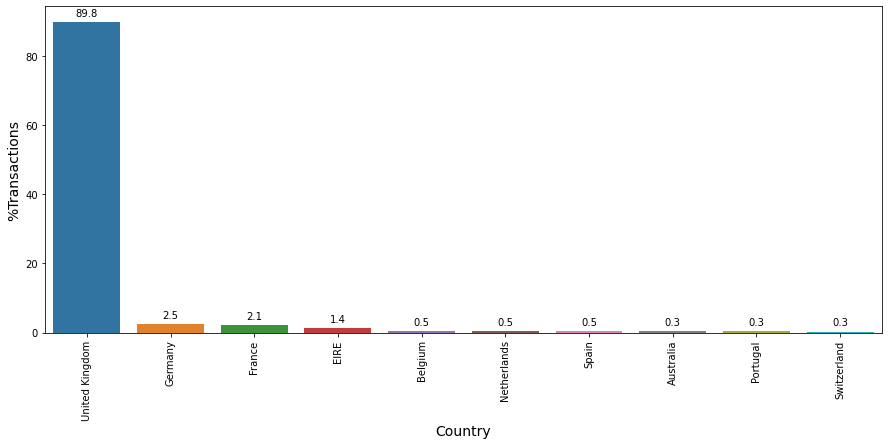

In [30]:
# Country-wise transactions
temp = df1_filtered.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Transactions'})
total = temp['Transactions'].sum(axis=0)
temp['%Transactions'] = round((temp['Transactions']/total)*100,4)

temp.sort_values(by=['%Transactions'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
splot=sns.barplot(x="Country",y="%Transactions",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=14)
plt.ylabel("%Transactions", size=14)

Text(0, 0.5, '%Customers')

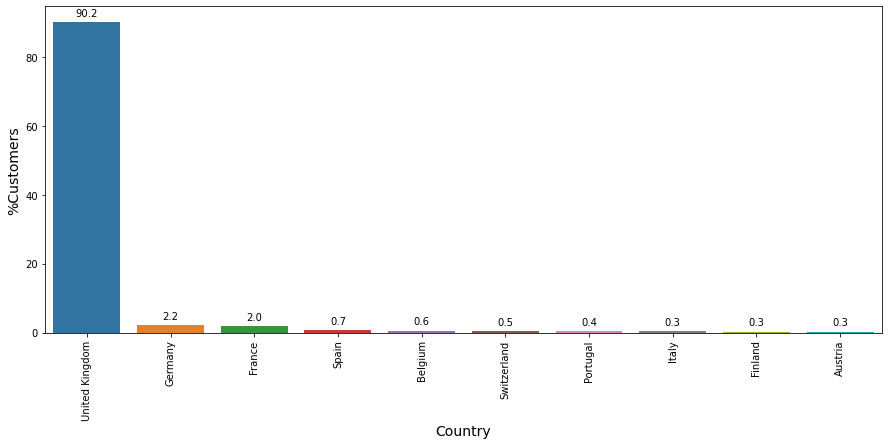

In [31]:
# Country-wise customers
temp = df.groupby(['Country'],as_index=False).agg({'CustomerID':'nunique'}).rename(columns = {'CustomerID':'Customers'})
total = temp['Customers'].sum(axis=0)
temp['%Customers'] = round((temp['Customers']/total)*100,4)

temp.sort_values(by=['%Customers'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
splot=sns.barplot(x="Country",y="%Customers",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=14)
plt.ylabel("%Customers", size=14)

In [32]:
# SUBSET DATA 

df1_filtered_uk = df1_filtered[df1_filtered.Country == 'United Kingdom']

 
df1_filtered_uk.info()
df1_filtered_uk.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 406813
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
 8   Cancelled    354345 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.7+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,F
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,F
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,F
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,F
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,F


In [34]:
# Remove column name 'Country' 'Cancelled'
df1_filtered_uk_new = df1_filtered_uk.drop(['Country','Cancelled'], axis = 1)

df1_filtered_uk_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...,...,...
406809,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0
406810,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0
406811,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0
406812,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0


In [35]:
 df1_filtered_uk_new.info()
 df1_filtered_uk_new.head()



# Summarizing the number of products, transactions and unique customers
# There are 3665 products, 44339373 customers and a total of 18536 transactions
pd.DataFrame([{'products': len(df1_filtered_uk_new['StockCode'].value_counts()),    
               'transactions': len(df1_filtered_uk_new['InvoiceNo'].value_counts()),
               'customers': len(df1_filtered_uk_new['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 406813
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.6+ MB


,products,transactions,customers
quantity,3645,16649,3921


In [36]:
# Feature Engineering

# Column to identify repeat orders from customers (Target Variable definition)
# The training data should include all customers who have made a transaction between 1st Dec 2010 to 31st Aug 2011


# Filter data between  1st Dec 2010 to 31st Aug 2011
df2 = df1_filtered_uk_new.loc[(df1_filtered_uk_new['InvoiceDate'] >= '2010-12-01')
                     & (df1_filtered_uk_new['InvoiceDate'] <= '2011-09-01')]
# Display
df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200364 entries, 0 to 232045
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    200364 non-null  object        
 1   StockCode    200364 non-null  object        
 2   Description  200364 non-null  object        
 3   Quantity     200364 non-null  int64         
 4   InvoiceDate  200364 non-null  datetime64[ns]
 5   UnitPrice    200364 non-null  float64       
 6   CustomerID   200364 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 12.2+ MB


In [37]:

# Filter data between 1st Sep 2011 to 30th Dec 2011
df3 = df1_filtered_uk_new.loc[(df1_filtered_uk_new['InvoiceDate'] >= '2011-09-01')
                     & (df1_filtered_uk_new['InvoiceDate'] <= '2011-12-30')]
# Display
df3
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 153981 entries, 232053 to 406813
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    153981 non-null  object        
 1   StockCode    153981 non-null  object        
 2   Description  153981 non-null  object        
 3   Quantity     153981 non-null  int64         
 4   InvoiceDate  153981 non-null  datetime64[ns]
 5   UnitPrice    153981 non-null  float64       
 6   CustomerID   153981 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 9.4+ MB


Text(0, 0.5, '%Customers')

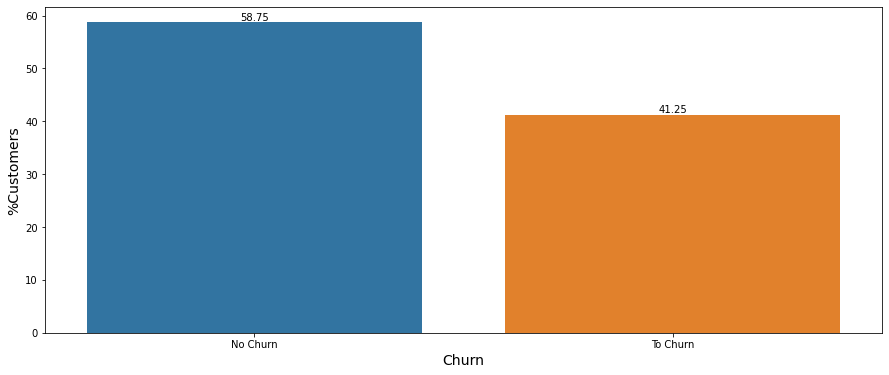

In [45]:
# Customers from this set who have NOT made any subsequent purchase in the period Sep 2011 to Dec 2011 should be labeled as “Churn”. 
# All other customers with purchases made during this follow-up period should be labelled as “Not Churn”

df_train = df2.assign(Churn=df2.CustomerID.isin(df3.CustomerID).astype(int))

df_train 
# Replace 0 and 1 values with 'To Churn' and 'No Churn' values  in Churn columns
# 0 - Customers in df2 are Not present in df3 - These are the customers To Churn
# 1 - Customers in df2 are present in df3 - These customers are categorised as No Churn

df_train['Churn'] = np.where(df_train['Churn'] == 0, 'To Churn', 'No Churn')

#Customers vs Churn
temp = df_train.groupby(['Churn'],as_index=False).agg({'CustomerID':'nunique'}).rename(columns = {'CustomerID':'Customers'})
total = temp['Customers'].sum(axis=0)
temp['%Customers'] = round((temp['Customers']/total)*100,4)

temp.sort_values(by=['%Customers'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)
plt.figure(figsize=(15,6))
#plt.xticks(rotation=90)
splot=sns.barplot(x="Churn",y="%Customers",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Churn", size=14)
plt.ylabel("%Customers", size=14)




In [ ]:
df_train

In [62]:
# Deriving Total Sales
df_train['TotalSales'] = df_train['Quantity'] *  df_train['UnitPrice'] 


# Deriving Month, Day from Invoice Date
df_train['year'] = pd.DatetimeIndex(df_train['InvoiceDate']).year
df_train['month'] = pd.DatetimeIndex(df_train['InvoiceDate']).month
df_train['day'] = pd.DatetimeIndex(df_train['InvoiceDate']).day
df_train['weekday'] = pd.DatetimeIndex(df_train['InvoiceDate']).dayofweek #gives only the index(0-monday,6-sunday)
# remove rows where Customer ID = 0 and rows containing NaN values
#df_train.columns[6]
#exists = 0 in df_train.CustomerID
#print(exists)

# Get indexes where name column has value john and 
# value column equals to 0.0
indexNames = df_train[ (df_train['CustomerID'] == 0.0)].index
# Delete these row indexes from dataFrame
df_train.drop(indexNames , inplace=True)
df_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Churn,TotalSales,year,month,day,weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,To Churn,15.30,2010,12,1,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,To Churn,20.34,2010,12,1,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,To Churn,22.00,2010,12,1,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,To Churn,20.34,2010,12,1,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,To Churn,20.34,2010,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232041,565067,22644,CERAMIC CHERRY CAKE MONEY BANK,2,2011-08-31 17:16:00,1.45,15856.0,No Churn,2.90,2011,8,31,2
232042,565067,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,2,2011-08-31 17:16:00,1.45,15856.0,No Churn,2.90,2011,8,31,2
232043,565067,22637,PIGGY BANK RETROSPOT,2,2011-08-31 17:16:00,2.55,15856.0,No Churn,5.10,2011,8,31,2
232044,565067,22646,CERAMIC STRAWBERRY CAKE MONEY BANK,2,2011-08-31 17:16:00,1.45,15856.0,No Churn,2.90,2011,8,31,2


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0, 0.5, 'Quantity, TotalSales')

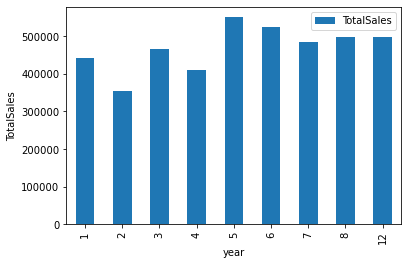

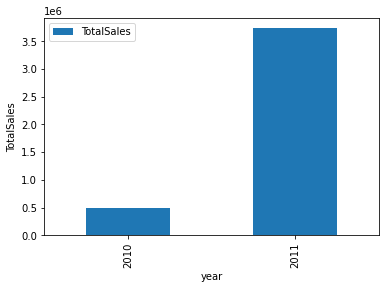

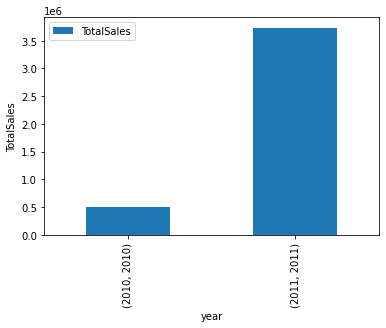

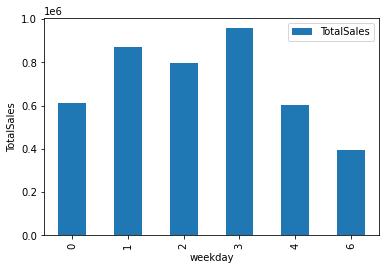

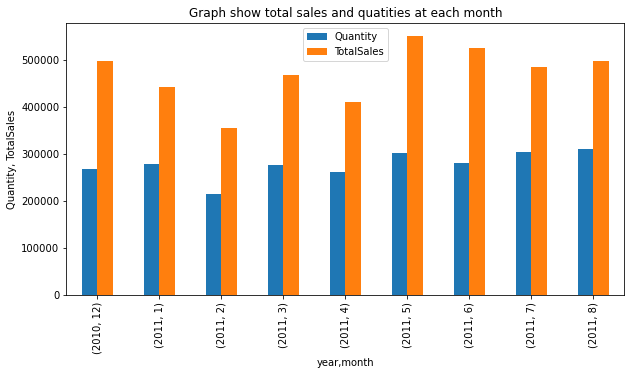

In [63]:
rep_plot = df_train.groupby("month").agg({'TotalSales':'sum'}).plot(kind='bar')
rep_plot.set_xlabel("year")
rep_plot.set_ylabel("TotalSales")

rep_plot = df_train.groupby("year").agg({'TotalSales':'sum'}).plot(kind='bar')
rep_plot.set_xlabel("year")
rep_plot.set_ylabel("TotalSales")

result = df_train.groupby([df_train['year'], df_train['year']]).agg({'TotalSales':sum}).plot(kind='bar')
print(result)
result.set_xlabel("year")
result.set_ylabel("TotalSales")

result = df_train.groupby([df_train['weekday']]).agg({'TotalSales':sum}).plot(kind='bar')
print(result)
result.set_xlabel("weekday")
result.set_ylabel("TotalSales")

modifed_df = df_train[['Quantity','TotalSales','year','month']].copy()
date_df = modifed_df.groupby(['year','month']).sum()
total_values = date_df.sort_values('year',ascending=True)
total_values.plot(kind='bar',figsize=(10,5),title='Graph show total sales and quatities at each month')
plt.ylabel('Quantity, TotalSales')




In [76]:
# Top 20 products by sales
modifed_df = df_train[['StockCode','TotalSales']].copy()

prod_sales = pd.DataFrame(modifed_df.groupby('StockCode').sum()['TotalSales'])

prod_sales.sort_values(by=['TotalSales'], inplace=True, ascending=False)

top_prods = prod_sales.head(20)

top_prods
top_prods.plot(kind='bar',figsize=(10,5),title='Graph show top 20 product by total sales')
plt.ylabel('TotalSales')
#---------------------------------------------------------------------------------------
modifed_df = df_train[['StockCode','TotalSales']].copy()

prod_sales = pd.DataFrame(modifed_df.groupby('StockCode').mean()['TotalSales'])

prod_sales.sort_values(by=['TotalSales'], inplace=True, ascending=False)

top_prods = prod_sales.head(20)

top_prods
top_prods.plot(kind='bar',figsize=(10,5),title='Graph show top 20 product by Avg sales')
plt.ylabel('TotalSales')

prod_sales = pd.DataFrame(modifed_df.groupby('StockCode').sum()['TotalSales'])
prod_sales.plot(kind='box')
#set title,xlabel,ylabel
plt.title('Sales Analysis by product')

Text(0.5, 1.0, 'Sales Analysis by product')

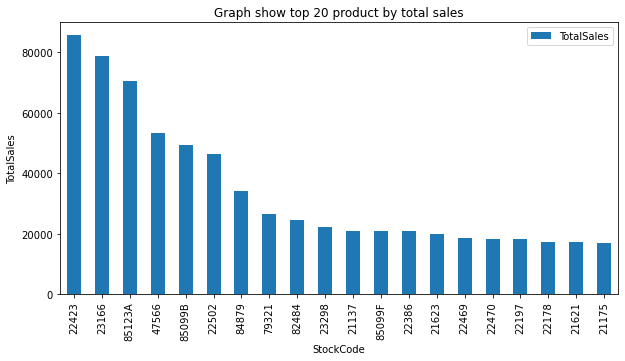

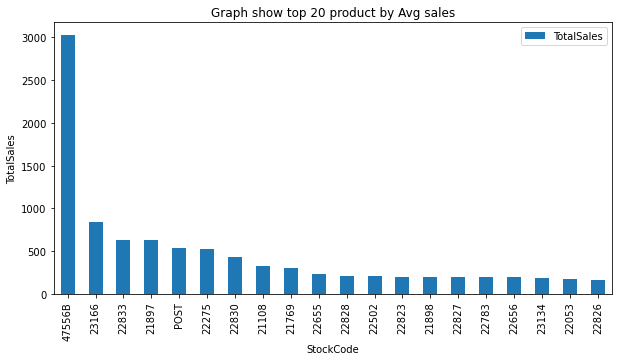

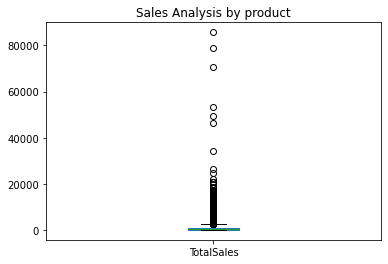

In [76]:
# Top 20 products by customers
modifed_df = df_train[['CustomerID','TotalSales']].copy()

cust_sales = pd.DataFrame(modifed_df.groupby('CustomerID').sum()['TotalSales'])

cust_sales.sort_values(by=['CustomerID'], inplace=True, ascending=False)

top_cust = cust_sales.head(20)

top_cust
top_cust.plot(kind='bar',figsize=(10,5),title='Graph show top 20 product by total sales')
plt.ylabel('TotalSales')
#---------------------------------------------------------------------------------------
modifed_df = df_train[['CustomerID','TotalSales']].copy()

cust_sales = pd.DataFrame(modifed_df.groupby('CustomerID').mean()['TotalSales'])

cust_sales.sort_values(by=['TotalSales'], inplace=True, ascending=False)

top_cust = cust_sales.head(20)

top_cust
top_cust.plot(kind='bar',figsize=(10,5),title='Graph show top 20 product by Avg sales')
plt.ylabel('TotalSales')

cust_sales = pd.DataFrame(modifed_df.groupby('CustomerID').sum()['TotalSales'])
cust_sales.plot(kind='box')
#set title,xlabel,ylabel
plt.title('Sales Analysis by product')

In [76]:
# Top 10 products by sales
modifed_df = df_train[['StockCode','TotalSales']].copy()

prod_sales = pd.DataFrame(modifed_df.groupby('StockCode').sum()['TotalSales'])

prod_sales.sort_values(by=['TotalSales'], inplace=True, ascending=False)

top_prods = prod_sales.head(20)

top_prods
top_prods.plot(kind='bar',figsize=(10,5),title='Graph show top 20 product by total sales')
plt.ylabel('TotalSales')
#---------------------------------------------------------------------------------------
modifed_df = df_train[['StockCode','TotalSales']].copy()

prod_sales = pd.DataFrame(modifed_df.groupby('StockCode').mean()['TotalSales'])

prod_sales.sort_values(by=['TotalSales'], inplace=True, ascending=False)

top_prods = prod_sales.head(20)

top_prods
top_prods.plot(kind='bar',figsize=(10,5),title='Graph show top 20 product by Avg sales')
plt.ylabel('TotalSales')

prod_sales = pd.DataFrame(modifed_df.groupby('StockCode').sum()['TotalSales'])
prod_sales.plot(kind='box')
#set title,xlabel,ylabel
plt.title('Sales Analysis by product')

In [ ]:
# Customer level analysis
# Adding one more day to the max data, so that the max date will have 1 as the difference and not zero.


temp = df_train.groupby('CustomerID').agg({'InvoiceDate':lambda x: (x.max()+pd.DateOffset(days = 1)- x.min()).days, 'InvoiceNo':lambda x:len(x), 'TotalSales':lambda x:sum(x)})
temp.columns = ['Recency','Freq','Value']
temp.dropna(subset = ['Recency'], inplace=True)
temp.sort_values(by=['Recency'],ascending=False)

In [ ]:
# Outlier treatment
#fig, axs = plt.subplots(1,3, figsize = (15,5))

#sns.boxplot(temp.Value, ax = axs[0])
#sns.boxplot(temp.Freq, ax = axs[1])
#sns.boxplot(temp.Recency, ax = axs[2])

#we see that the plot contain outliers
# outlier treatment for Recency, Freq, Value
Q1 = temp.Recency.quantile(0.25)
Q3 = temp.Recency.quantile(0.75)
IQR1 = Q3 - Q1
temp = temp[(temp.Recency >= Q1 - 1.5*IQR1) & (temp.Recency <= Q3 + 1.5*IQR1)]

Q1 = temp.Freq.quantile(0.25)
Q3 = temp.Freq.quantile(0.75)
IQR2 = Q3 - Q1
temp = temp[(temp.Freq >= Q1 - 1.5*IQR2) & (temp.Freq <= Q3 + 1.5*IQR2)]

Q1 = temp.Value.quantile(0.25)
Q3 = temp.Value.quantile(0.75)
IQR3 = Q3 - Q1
temp = temp[(temp.Value >= Q1 - 1.5*IQR3) & (temp.Value <= Q3 + 1.5*IQR3)]

fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(temp.Value, ax = axs[0])
sns.boxplot(temp.Freq, ax = axs[1])
sns.boxplot(temp.Recency, ax = axs[2])

In [ ]:
# To Scale our RFM data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
temp_norm1 = standard_scaler.fit_transform(temp)
temp_norm1 = pd.DataFrame(temp_norm1)
temp_norm1.columns = ['Recency','Freq','Value']
temp_norm1.head()




In [ ]:
df_train
# To perform KMeans clustering 
from sklearn.cluster import KMeans
#Here, X is our feature set; it contains all the columns except the one that we have to predict (Churn). 
# The label set, y, contains only the Churn column.

X =  df_train.drop(['Churn'], axis=1)
Y = df_train['Churn']
#we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k. 
#Next, we choose the k for which WSS first starts to diminish. This value of K gives us the best number of clusters to make from the raw data.
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)
    

In [ ]:
df_train.dtypes

In [ ]:
#Here, X is our feature set; it contains all the columns except the one that we have to predict (Churn). 
# The label set, y, contains only the Churn column.

X =  df_train.drop(['InDF3'], axis=1)
Y = df_train['InDF3']

#We'll use 20% of the data for the test set and the remaining 80% for the training set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X, Y)
 